In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("../data/raw/ER Wait Time Dataset.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # clean column names
df.head()

,visit_id,patient_id,hospital_id,hospital_name,region,visit_date,day_of_week,season,time_of_day,urgency_level,nurse-to-patient_ratio,specialist_availability,facility_size_(beds),time_to_registration_(min),time_to_triage_(min),time_to_medical_professional_(min),total_wait_time_(min),patient_outcome,patient_satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30 04:02:28,Monday,Fall,Evening,Low,5,1,38,38,40,125,203,Discharged,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27 00:31:13,Tuesday,Winter,Evening,High,4,5,94,8,16,64,88,Discharged,2
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06 16:52:26,Wednesday,Spring,Afternoon,Low,4,8,74,26,29,63,118,Discharged,1


In [3]:
df['visit_date'] = pd.to_datetime(df['visit_date'], errors='coerce')
print(df.isnull().sum())
df['nurse-to-patient_ratio'] = df['nurse-to-patient_ratio'].fillna(df['nurse-to-patient_ratio'].median())
df['specialist_availability'] = df['specialist_availability'].fillna('unknown')
df = df[(df['total_wait_time_(min)'] >= 0) & (df['total_wait_time_(min)'] <= 600)]
df['is_weekend'] = df['day_of_week'].isin(['Saturday','Sunday']).astype(int)


visit_id                              0
patient_id                            0
hospital_id                           0
hospital_name                         0
region                                0
visit_date                            0
day_of_week                           0
season                                0
time_of_day                           0
urgency_level                         0
nurse-to-patient_ratio                0
specialist_availability               0
facility_size_(beds)                  0
time_to_registration_(min)            0
time_to_triage_(min)                  0
time_to_medical_professional_(min)    0
total_wait_time_(min)                 0
patient_outcome                       0
patient_satisfaction                  0
dtype: int64


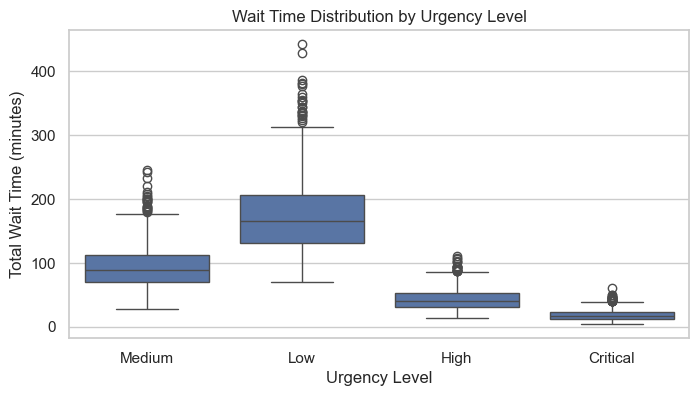

In [4]:
plt.figure(figsize=(8,4))
sns.boxplot(
    x='urgency_level', 
    y='total_wait_time_(min)', 
    data=df
)
plt.title("Wait Time Distribution by Urgency Level")
plt.xlabel("Urgency Level")
plt.ylabel("Total Wait Time (minutes)")
plt.show()


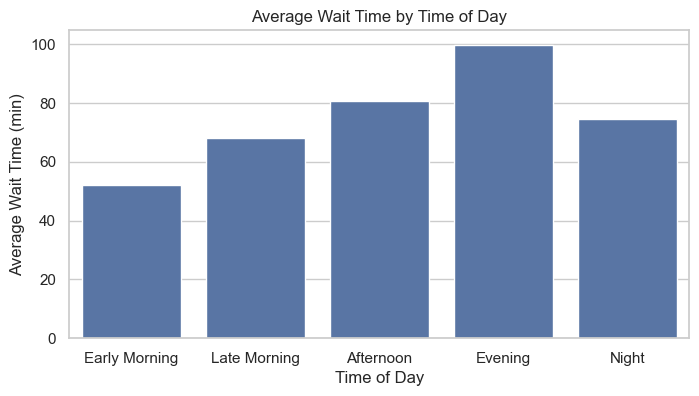

In [5]:
# Average wait time by time_of_day

avg_by_tod = df.groupby('time_of_day')['total_wait_time_(min)'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='time_of_day', y='total_wait_time_(min)', data=avg_by_tod, order=['Early Morning','Late Morning','Afternoon','Evening','Night'])
plt.title("Average Wait Time by Time of Day")
plt.ylabel("Average Wait Time (min)")
plt.xlabel("Time of Day")
plt.show()



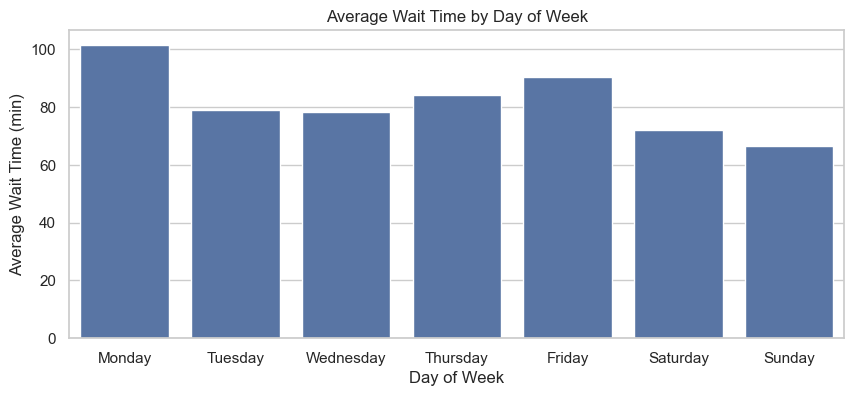

In [7]:
# Average wait time by day_of_week

avg_by_dow = df.groupby('day_of_week')['total_wait_time_(min)'].mean().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x='day_of_week', y='total_wait_time_(min)', data=avg_by_dow, 
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Average Wait Time by Day of Week")
plt.ylabel("Average Wait Time (min)")
plt.xlabel("Day of Week")
plt.show()


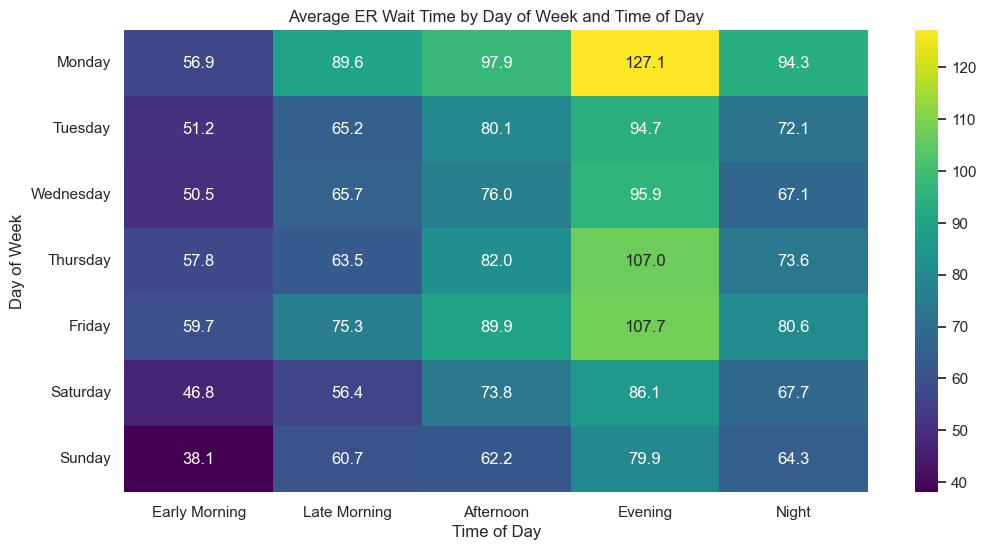

In [8]:
# Heatmap (Day vs Hour)

pivot = df.pivot_table(
    index='day_of_week',
    columns='time_of_day',
    values='total_wait_time_(min)',
    aggfunc='mean'
)

# Reorder days of the week
pivot = pivot.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# Reorder time_of_day based on your dataset
pivot = pivot[['Early Morning','Late Morning','Afternoon','Evening','Night']]

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="viridis")
plt.title("Average ER Wait Time by Day of Week and Time of Day")
plt.ylabel("Day of Week")
plt.xlabel("Time of Day")
plt.show()


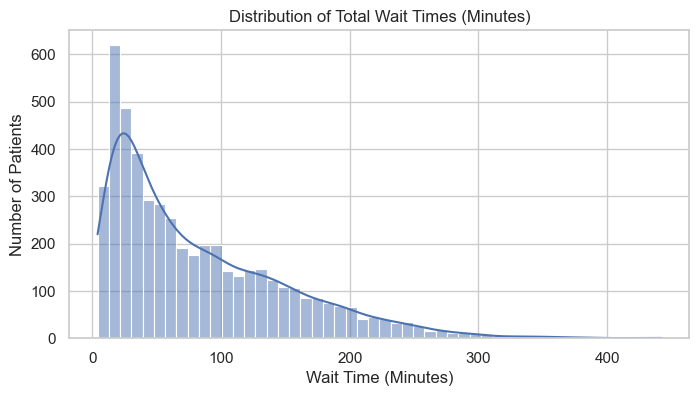

In [9]:
# Distribution of wait times

plt.figure(figsize=(8,4))
sns.histplot(df['total_wait_time_(min)'], bins=50, kde=True)
plt.title("Distribution of Total Wait Times (Minutes)")
plt.xlabel("Wait Time (Minutes)")
plt.ylabel("Number of Patients")
plt.show()


In [10]:
# save Clean data
df.to_csv("../Data/processed/er_cleaned.csv", index=False)


In [11]:
import os
print(os.path.abspath("Data/processed/er_visits.db"))



e:\Projects\ER-wait-time-analysis\notebooks\Data\processed\er_visits.db
